# Buisness Case : House Price Prediction

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('data.csv') # to import the data
data.head() # to get first 5 rows.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Domain Analysis
**Acknowledgments**

The Ames Housing dataset was compiled by *Dean De Cock* for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 


**Data fields**

Following are the columns and their descriptions available in the datasets.

1.   **SalePrice** - the property's sale price in dollars. [ Target variable ]
2.  **MSSubClass**: The building class [ Discrete data ]
3.   **MSZoning**: The general zoning classification [ Categorical Nominal data , there are five zones: C (all) , FV , RH , RL , RM ]
4.   **LotFrontage**: Linear feet of street connected to property
5.   **LotArea**: Lot size in square feet
6.   **Street**: Type of road access [ Categorical Nominal data , two types of access: Gravel , Pavement ]
7.   **Alley**: Type of alley access [ Categorical Nominal data , three options: Gravel , pavement or none ]
8.   **LotShape**: General shape of property [ Categorical Nominal data , types: IR1 , IR2 , IR3 , Reg ]
9.   **LandContour**: Flatness of the property [ Categorical Nominal data , Types: Bnk , HLS , Low , Lvl ]
10.   **Utilities**: Type of utilities available [ Categorical Nominal data , Two options: AllPub , No SeWa ]
11.   **LotConfig**: Lot configuration [ Categorical Nominal data , Types: Corner , CulDSac ,  FR2 , FR3 , Inside ]
12.   **LandSlope**: Slope of property [ Categorical Nominal data , Types: Gtl , Mod , Sev ]
13.   **Neighborhood**: Physical locations within Ames city limits [ Categorical Nominal data ]
14.   **Condition1**: Proximity to main road or railroad [ Categorical Nominal data ]
15.   **Condition2**: Proximity to main road or railroad (if a second is present) [ Categorical Nominal data ]
16.   **BldgType**: Type of dwelling [ Categorical Nominal data 1Fam , 2fmCon , Duplex , Twnhs ]
17.   **HouseStyle**: Style of dwelling [ Categorical Nominal data ]
18.   **OverallQual**: Overall material and finish quality [ Numerical discrete data ]
19.   **OverallCond**: Overall condition rating [ Categorical Ordinal data ]
20.   **YearBuilt**: Original construction date
21.   **YearRemodAdd**: Remodel date
22.   **RoofStyle**: Type of roof [ Categorical Nominal data ]
23.   **RoofMatl**: Roof material [ Categorical Nominal data ]
24.   **Exterior1st**: Exterior covering on house [ Categorical Nominal data ] 
25.   **Exterior2nd**: Exterior covering on house (if more than one material) [ Categorical Nominal data ]
26.   **MasVnrType**: Masonry veneer type [ Categorical Nominal data ]
27.   **MasVnrArea**: Masonry veneer area in square feet
28.   **ExterQual**: Exterior material quality [ Categorical Nominal data ]
29.   **ExterCond**: Present condition of the material on the exterior
30.   **Foundation**: Type of foundation  [ Categorical Nominal data ]
31.   **BsmtQual**: Height of the basement
32.   **BsmtCond**: General condition of the basement [ Categorical Nominal data ]
33.   **BsmtExposure**: Walkout or garden level basement walls [ Categorical Nominal data ]
34.   **BsmtFinType1**: Quality of basement finished area [ Categorical Nominal data ]
35.   **BsmtFinSF1**: Type 1 finished square feet
36.   **BsmtFinType2**: Quality of second finished area (if present) [ Categorical Nominal data ]
37.   **BsmtFinSF2**: Type 2 finished square feet
38.   **BsmtUnfSF**: Unfinished square feet of basement area [ Categorical Nominal data ]
39.   **TotalBsmtSF**: Total square feet of basement area
40.   **Heating**: Type of heating [ Categorical Nominal data ]
41.   **HeatingQC**: Heating quality and condition [ Categorical Nominal data ]
42.   **CentralAir**: Central air conditioning [ Categorical Nominal data , options Y or N ]
43.   **Electrical**: Electrical system [ Categorical Nominal data ]
44.   **1stFlrSF**: First Floor square feet
45.   **2ndFlrSF**: Second floor square feet
46.   **LowQualFinSF**: Low quality finished square feet (all floors)
47.   **GrLivArea**: Above grade (ground) living area square feet
48.   **BsmtFullBath**: Basement full bathrooms [ Numerical Discrete data ]
49.   **BsmtHalfBath**: Basement half bathrooms [ Numerical Discrete data ]
50.   **FullBath**: Full bathrooms above grade [ Numerical Discrete data ]
51.   **HalfBath**: Half baths above grade [ Numerical Discrete data ]
52.   **Bedroom**: Number of bedrooms above basement level [ Numerical Discrete data ]
53.   **Kitchen**: Number of kitchens [ Numerical Discrete data ]
54.   **KitchenQual**: Kitchen quality [ Categorical Nominal data ]
55.   **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms) [ Numerical Discrete data ]
56.   **Functional**: Home functionality rating [ Categorical Nominal data ]
57.   **Fireplaces**: Number of fireplaces [ Numerical Discrete data ]
58.   **FireplaceQu**: Fireplace quality [ Categorical Nominal data ]
59.   **GarageType**: Garage location [ Categorical Nominal data ]
60.   **GarageYrBlt**: Year garage was built
61.   **GarageFinish**: Interior finish of the garage [ Categorical Nominal data ]
62.   **GarageCars**: Size of garage in car capacity [ Numerical Discrete data ]
63.   **GarageArea**: Size of garage in square feet
64.   **GarageQual**: Garage quality [ Categorical Nominal data ]
65.   **GarageCond**: Garage condition [ Categorical Nominal data , options Y N P ]
66.   **PavedDrive**: Paved driveway
67.   **WoodDeckSF**: Wood deck area in square feet
68.   **OpenPorchSF**: Open porch area in square feet
69.   **EnclosedPorch**: Enclosed porch area in square feet
70.   **3SsnPorch**: Three season porch area in square feet
71.   **ScreenPorch**: Screen porch area in square feet
72.   **PoolArea**: Pool area in square feet
73.   **PoolQC**: Pool quality [ Categorical Nominal data ]
74.   **Fence**: Fence quality [ Categorical Nominal data ]
75.   **MiscFeature**: Miscellaneous feature not covered in other categories  [ Categorical Nominal data ]
76.   **MiscVal**: $Value of miscellaneous feature
77.   **MoSold**: Month Sold
78.   **YrSold**: Year Sold
79.   **SaleType**: Type of sale [ Categorical Nominal data ]
80.   **SaleCondition**: Condition of sale [ Categorical Ordinal data ]

# Basic Checks

In [3]:
data.tail() # to get last 5 rows.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [4]:
data.shape # data contains 1460 rows and 81 features.

(1460, 81)

In [5]:
data.sample(n=5) # To get random 5 rows.
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
data.info()
# dataset contains datatypes of float(3), int(35), object(43) features.
# It contains 43 categorical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
pd.set_option('display.max_columns',85) # To display all features.
pd.set_option('display.max_rows',90) # To display required no.of rows.
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
data.describe(include=['O']) # to describe categorical features.

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [9]:
data.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [10]:
data.duplicated().sum()
#no duplicate value present.

0

# EDA


In [11]:
data.set_index('Id',inplace=True) # to replace index with id.
data.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1         2         0             3   
3        1786             1             0         2         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
Id                                                                              
1              1          Gd             8        Typ           0         NaN   
2              1          TA             6        Typ           1          TA   
3              1          Gd             6        Typ           1          TA   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
Id                                                                           
1      Attchd       2003.0          RFn           2         548         TA   
2      Attchd       1976.0          RFn           2         460         TA   
3      Attchd       2001.0          RFn           2         608         TA   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                    

In [12]:
data.isnull().any() # to check missing data.

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF   

## Univariate Analysis

SalePrice,WooddeckSf,GrLivArea,TotalBsmtSF and MasvnsArea are highly skewed.

## Multivariate Analysis

In [13]:
from autoviz.AutoViz_Class import AutoViz_Class
from collections import defaultdict 
import datetime
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (1460, 81)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  31
    Number of String-Categorical Columns =  36
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  2
    Number of ID Columns =  1
    Number of Columns to Delete =  3
    80 Predictors classified...
        This does not include the Target column(s)
        5 variables removed since they were ID or low-information variables

################ Regression VISUALIZATION Started #####################
Number of variables = 75 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 72 Categorical vars selected 
    Rem

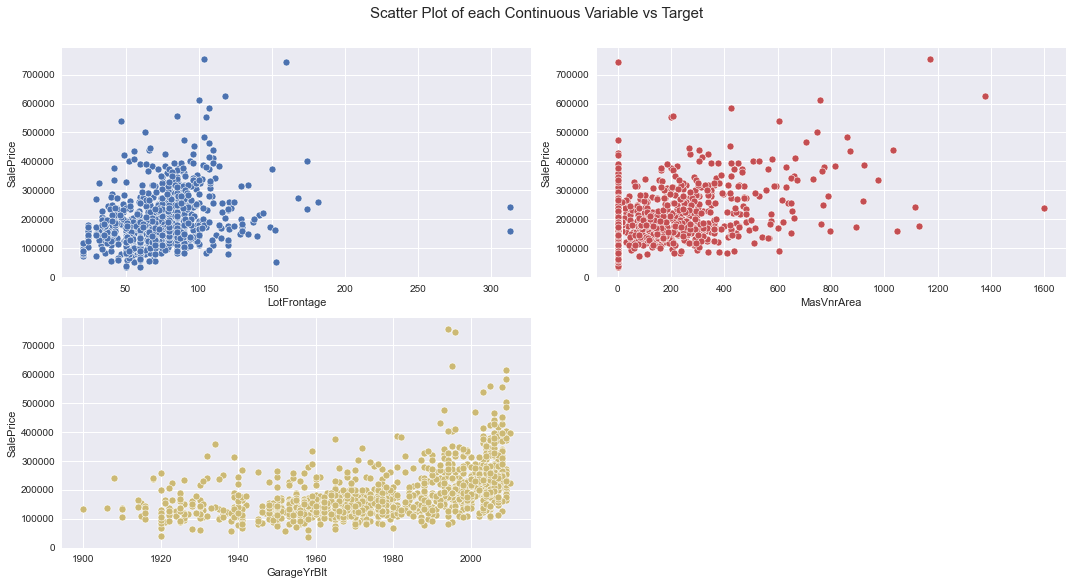

Number of All Scatter Plots = 6


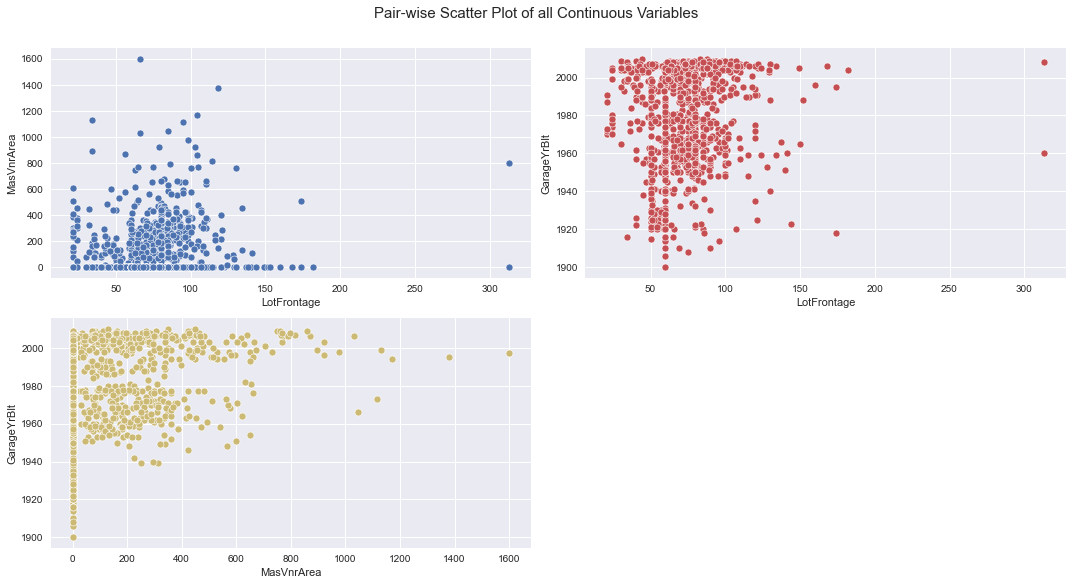

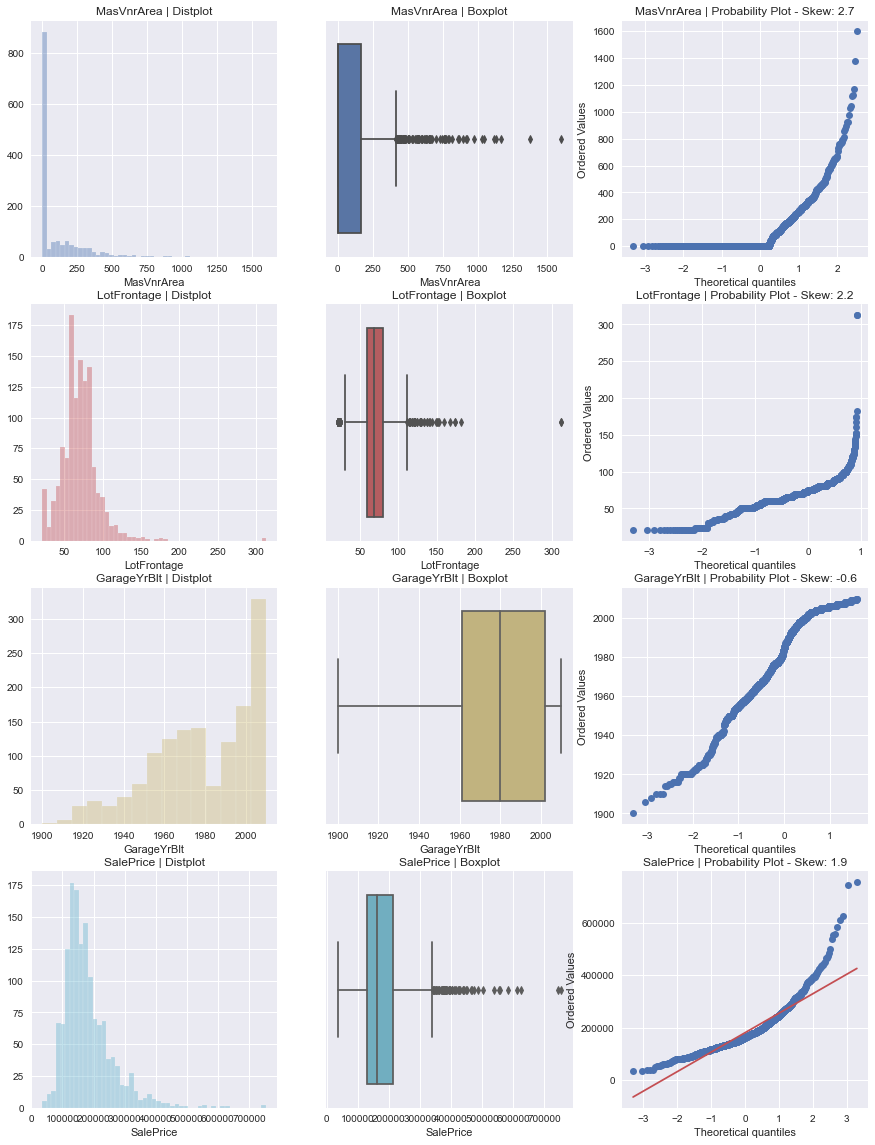

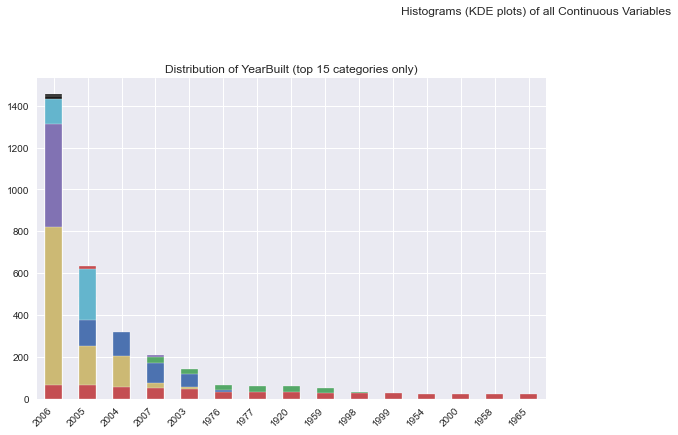

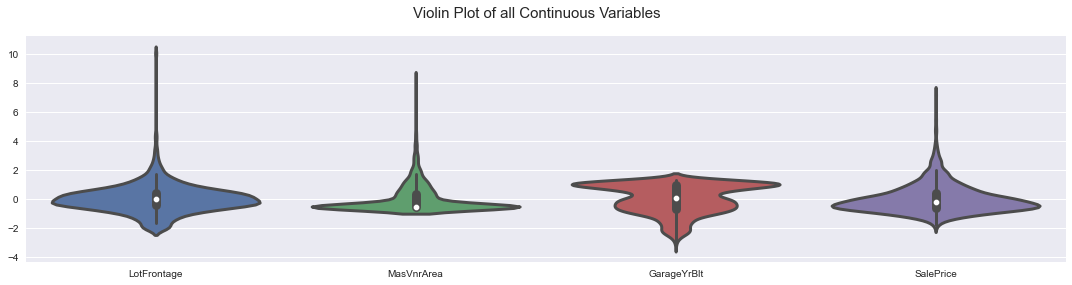

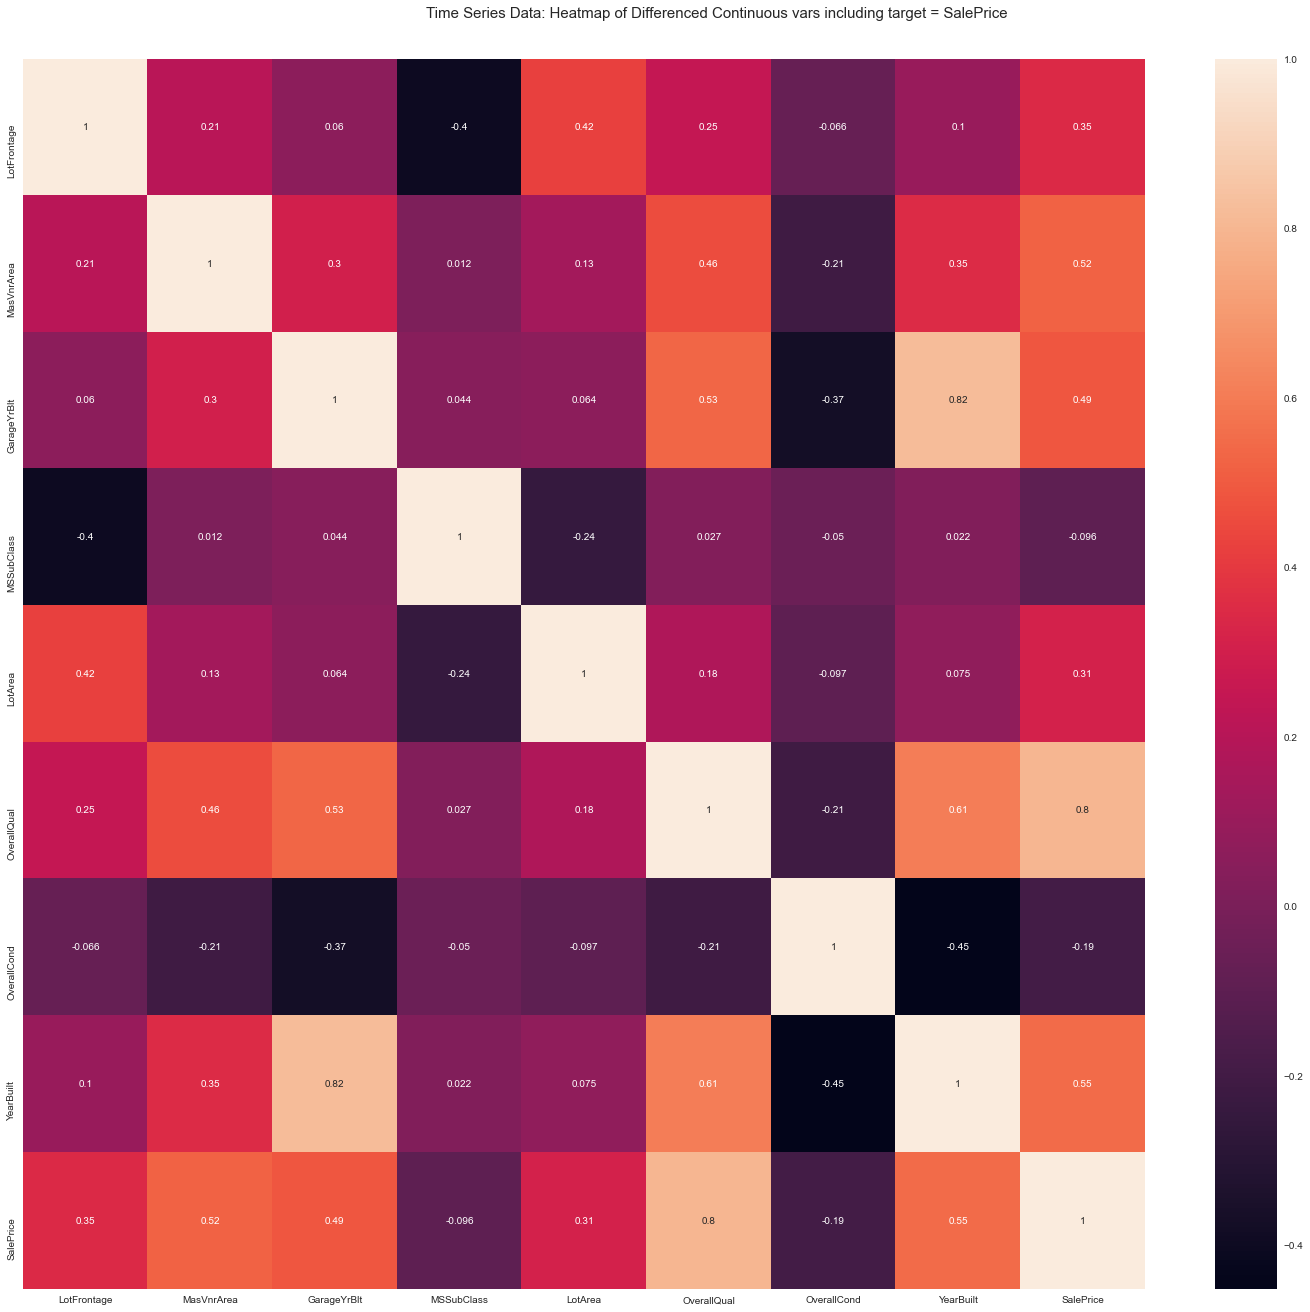

Could not draw Time Series plots


<Figure size 1080x576 with 0 Axes>

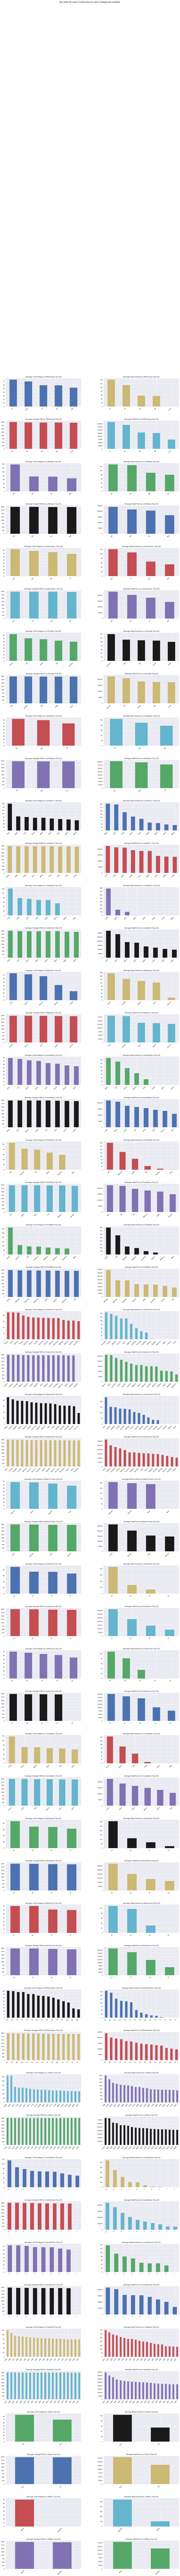

All Plots done
Time to run AutoViz (in seconds) = 165.612

 ###################### VISUALIZATION Completed ########################


In [14]:
df1 = AV.AutoViz("data.csv",depVar="SalePrice",dfte=data,)

In [15]:
numeric_data = data.select_dtypes(include=[np.number]) # To get numerical attributes
high_Cor_num = numeric_data[ numeric_data.corr().nlargest(10, 'SalePrice')['SalePrice'].index]

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

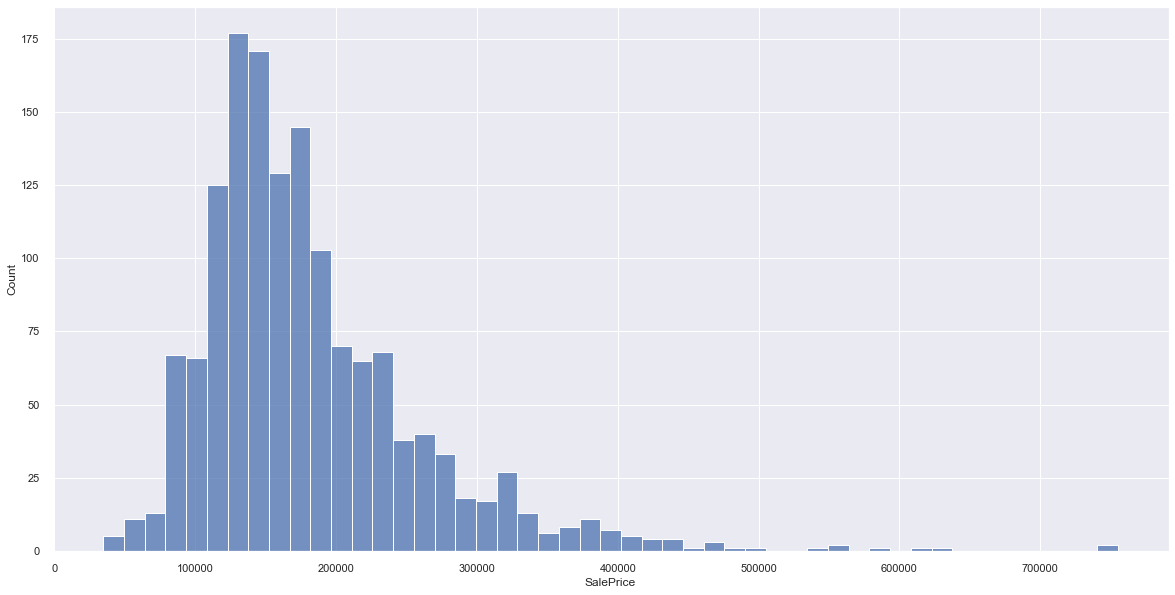

In [16]:
# To Analyze the behaviour of our target feature by using a histogram
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(20,10))
sns.histplot(high_Cor_num.SalePrice)

Conclusion drawn on basis of histogram:
1.   Right skewed graph obtained.
2.   The maximum and minimum prizes of the houses are 755000 and 34900 repectively.
3.   The average price is 180921.
4.   The price of maximum of the houses lie in the range of 13M to 21.4 M approximately.
5.   Very less number of houses have higher end Sale price.

In [17]:
# To Analyze the Target feature with respect to the highly correlated feature OverallQual with reference to YearBuilt.
np.sort(high_Cor_num.YearBuilt.unique())

array([1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904,
       1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010], dtype=int64)

In [18]:
high_Cor_num = high_Cor_num .apply(pd.to_numeric)
cat_year= high_Cor_num.copy()

In [19]:

cat_year['YearBuilt'] = list(map(lambda x : 1850 if x < 1900
                                 else ( 1900 if x >= 1900 and x < 1950 
                                       else (1950 if x >= 1950 and x < 2000 else 2000)),cat_year['YearBuilt']))

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

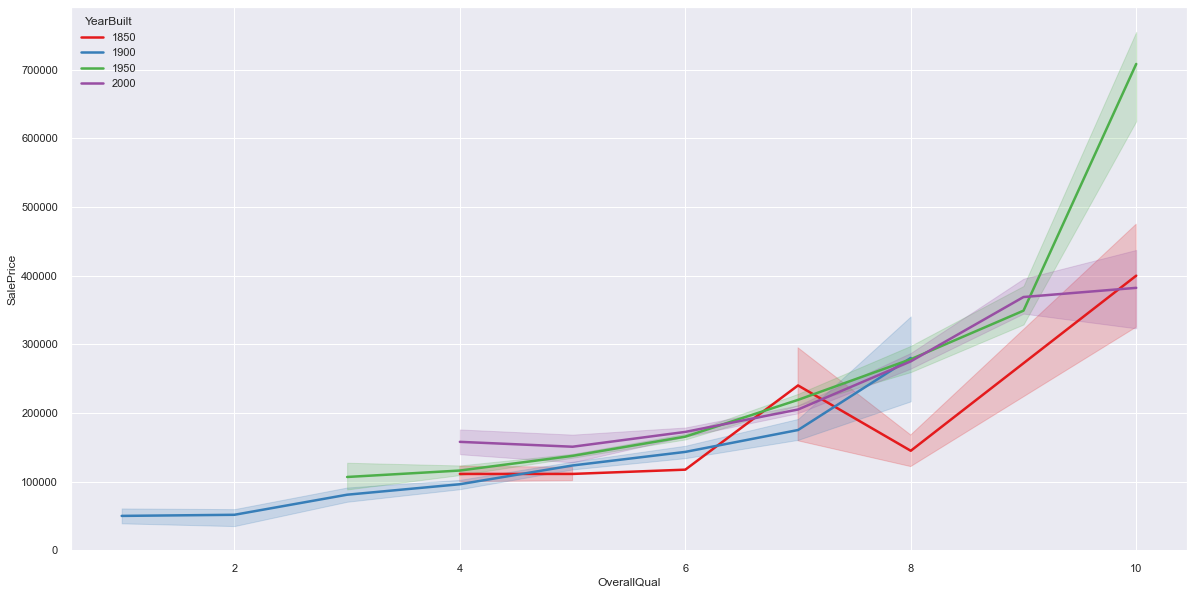

In [20]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(20,10))
sns.lineplot(data= cat_year,x= 'OverallQual', y='SalePrice',hue= 'YearBuilt',palette='Set1' )

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

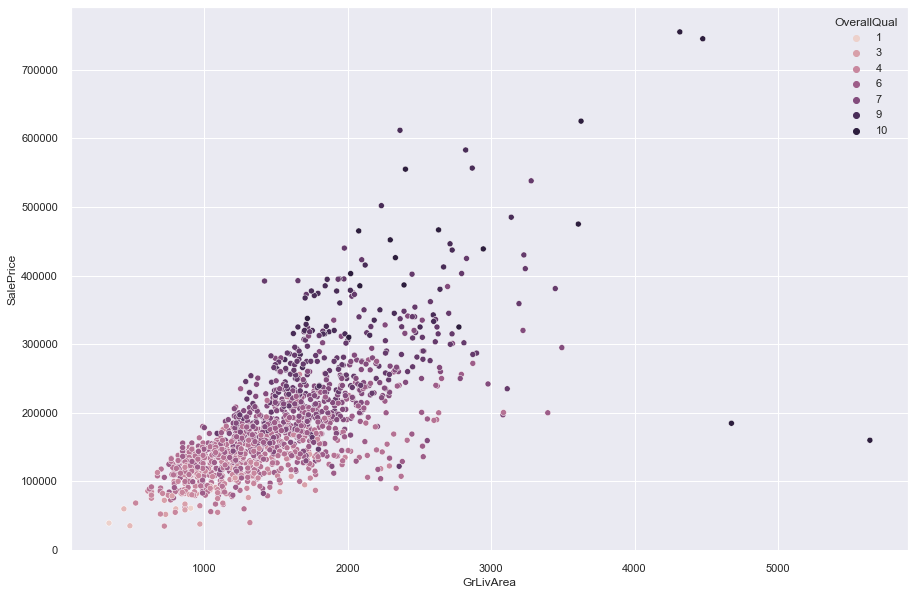

In [21]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(15,10))
sns.scatterplot(data= cat_year,x= 'GrLivArea', y='SalePrice',hue= 'OverallQual' )

Observation:
1. Maximum of the housed have living area within the range of 1000 to 2000 sq ft.
2. The size of the living area along with over all quality of the house seems to be directly proportional to Saleprice

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

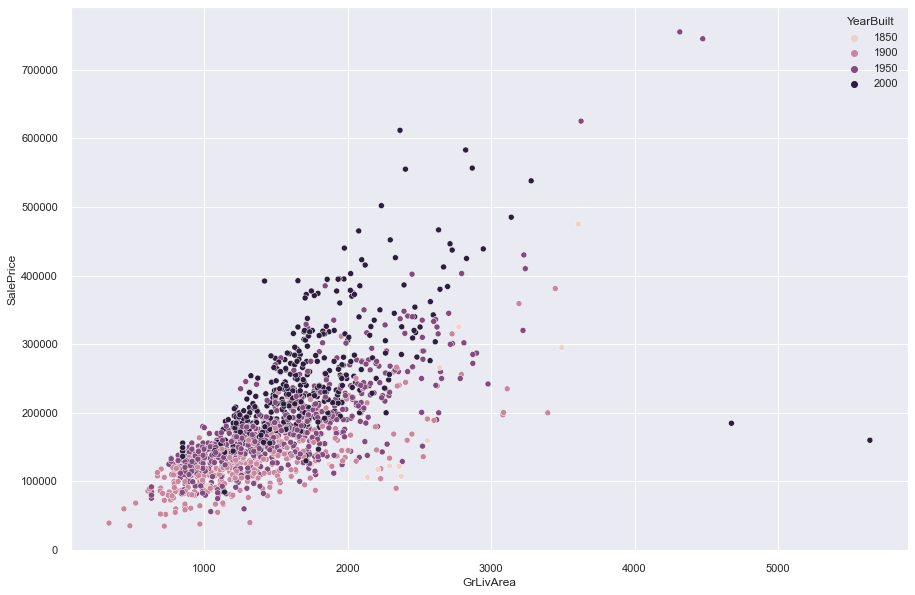

In [22]:
plt.subplots(figsize=(15,10))
sns.scatterplot(data= cat_year,x= 'GrLivArea', y='SalePrice',hue= 'YearBuilt' )

Observations:
1. The houses that were made between 1950-2000 seems to be have directly proportional relationship between the living area and the Saleprice.
2. However for the rest of max of the houses built in other year ranges the living area is limited to under 3000 sq ft range.

Categorial Features vs Target Feature

# Data Preprocessing

In [23]:
data_obj=[data.select_dtypes(include='object').columns]# To display categorical features.
data_obj

[Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object')]

In [24]:
# To get unique value of categorical features
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

In [25]:
## Create a new dataframe with categorical variables only
data_obj=data[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
            'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
            'ExterQual','Foundation','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtUnfSF','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','GarageQual','GarageCond','PoolQC','Fence','FireplaceQu',
            'GarageType','MiscFeature','GarageFinish','SaleType','ExterCond','PavedDrive','BsmtQual']]

In [26]:
data_num=data[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','GarageArea','GrLivArea']]

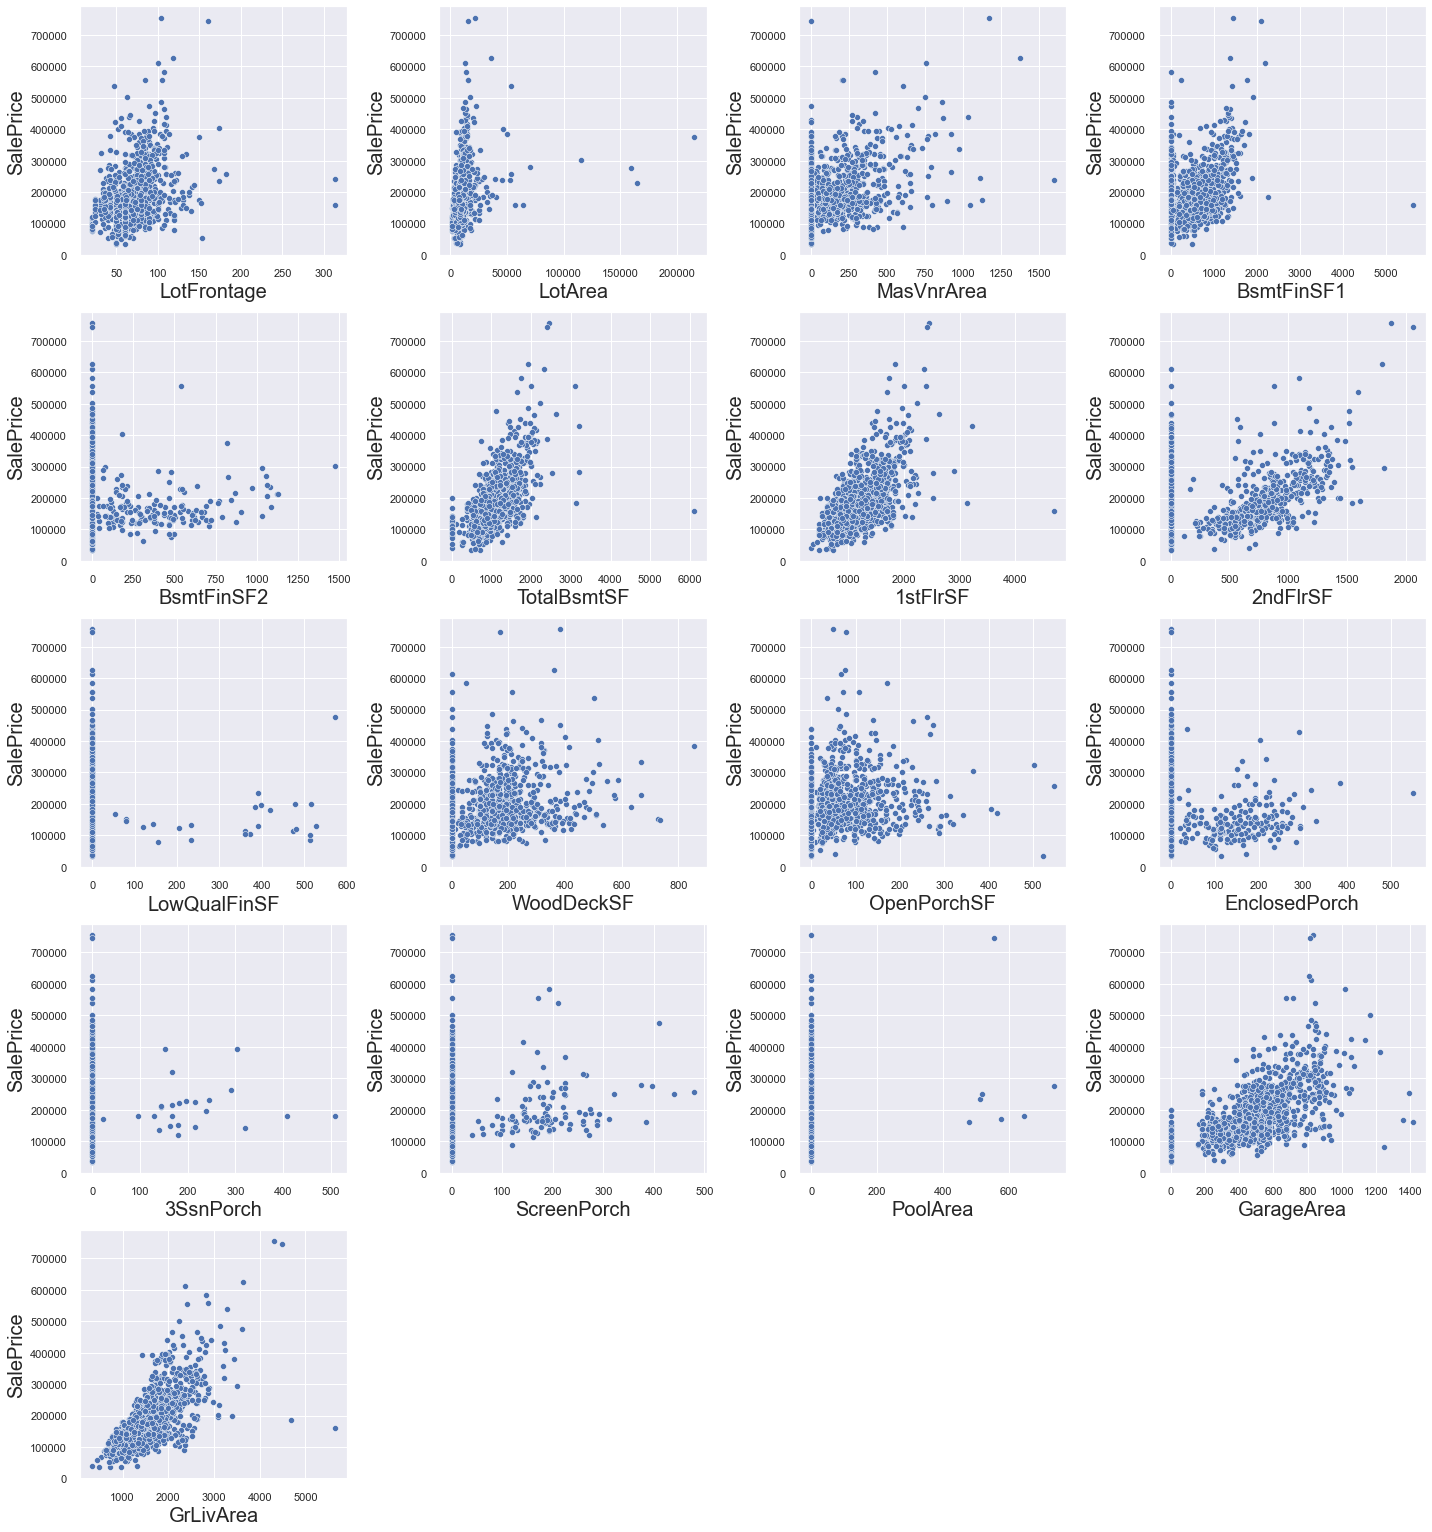

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=41 :
        ax = plt.subplot(6,4,plotnumber)
        sns.scatterplot(x=data_num[column].dropna(axis=0) #for continous data , we plot scatter plot
                        ,y=data.SalePrice)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

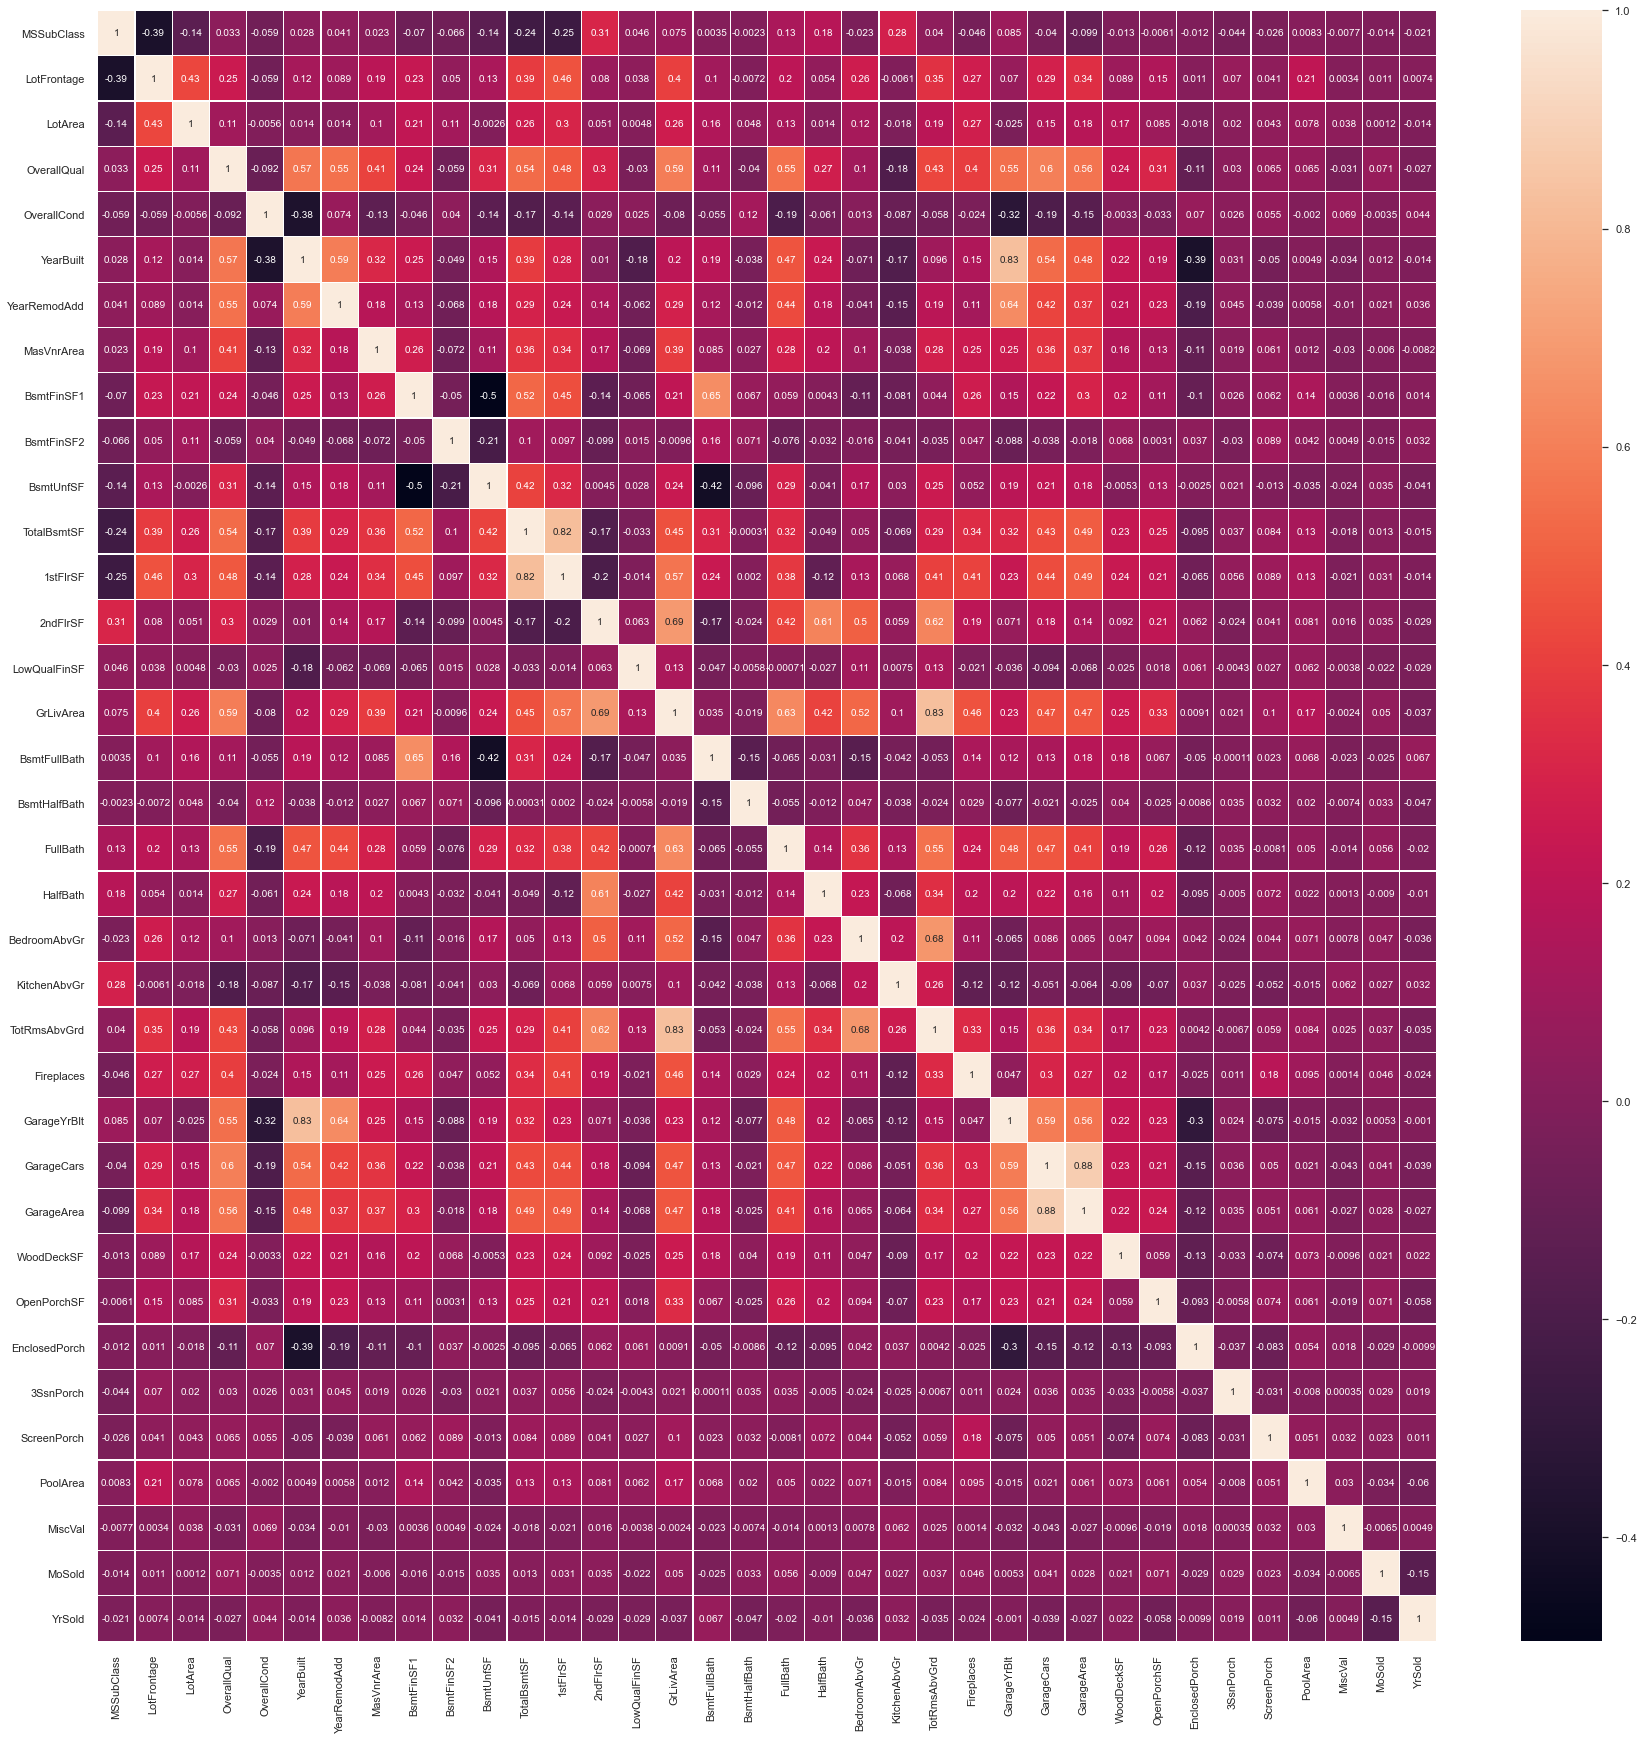

In [28]:
plt.figure(figsize=(30,30))
sns.heatmap(data.drop('SalePrice',axis=1).corr(),annot=True,linewidths=0.2,linecolor='white') # To know correlation betwn features

In [29]:
data.isnull().any().sum()
#Total no. of features having null values is 19.

19

In [30]:
data.columns[data.isnull().any()] # Except LotFrontage and MasVnrArea,all are categorical features in null list.

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [31]:
pd.set_option('display.max_rows',90)
data_na=data.isnull().sum()/data.shape[0]*100 # to display percentage of null value persent in column.
data_na

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

### Impute Missing Value.

In [32]:
# for categorical feature mode imputation is good.
null_obj = ['MasVnrType','Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu',
            'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
mode= data.filter(null_obj).mode()
# Median is more resistable for outliars.
data[null_obj]= data[null_obj].fillna(value= mode.iloc[0])
null_num= ['LotFrontage','MasVnrArea']
median= data.filter(null_num).median()
data[null_num]= data[null_num].fillna(value= median.iloc[0])

In [33]:
sum(data.isnull().any())

0

In [34]:
# function to visualise outliers.
def box(variable):
    plt.figure(figsize = (9,3))
    plt.boxplot(data[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

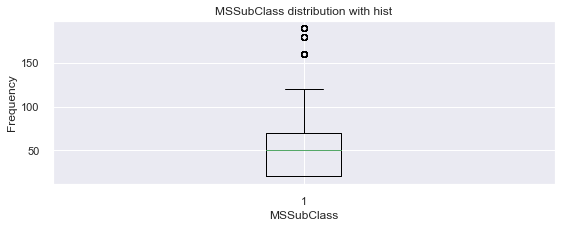

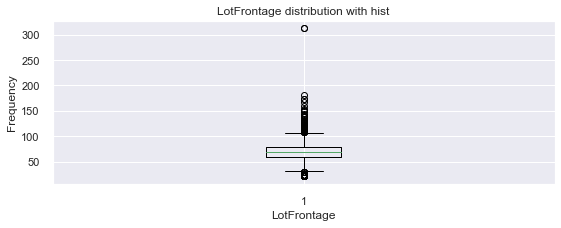

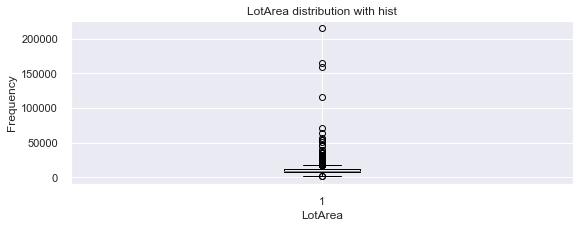

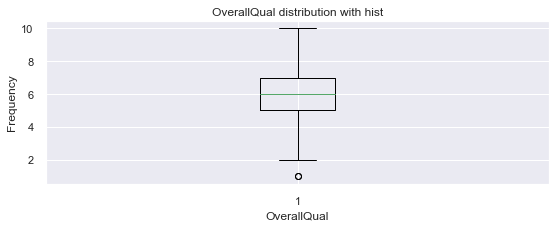

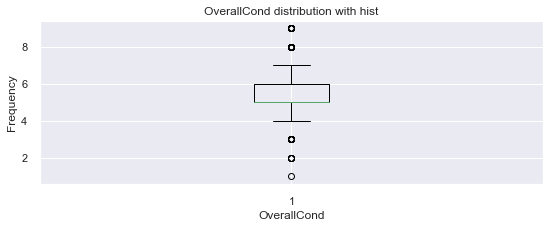

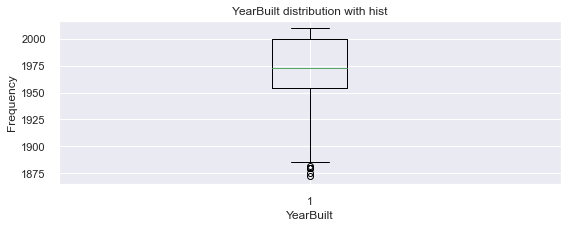

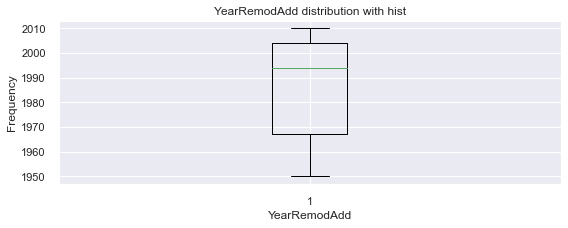

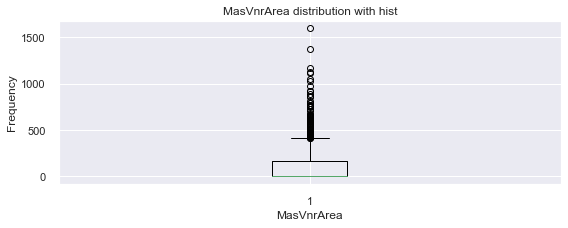

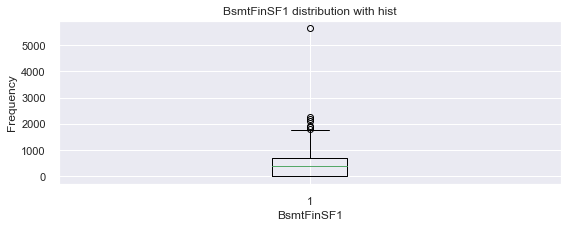

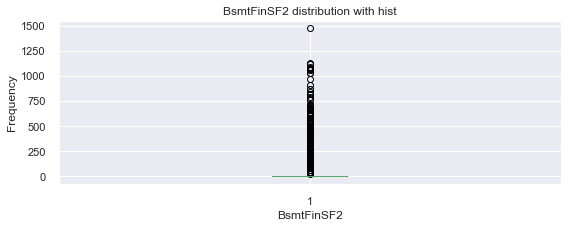

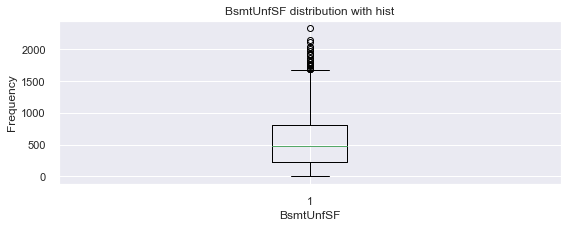

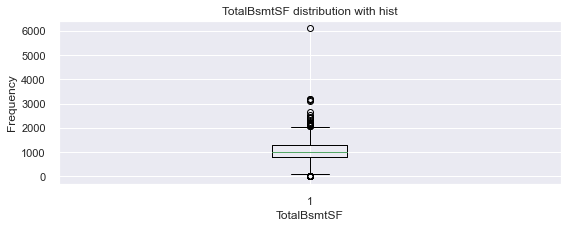

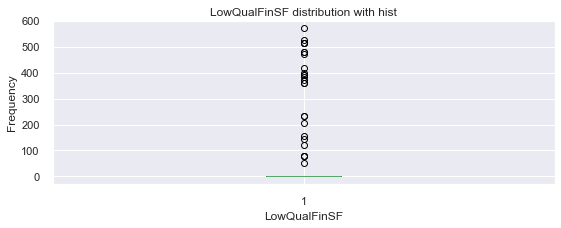

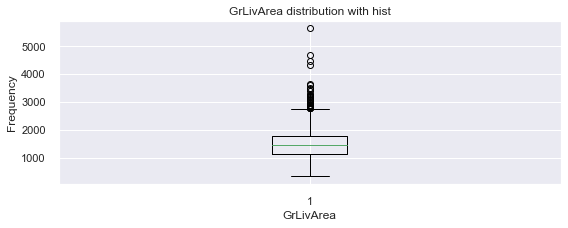

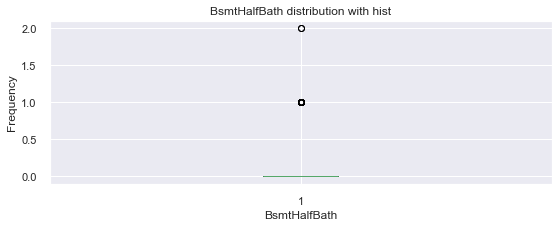

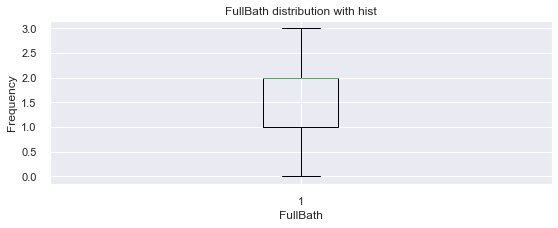

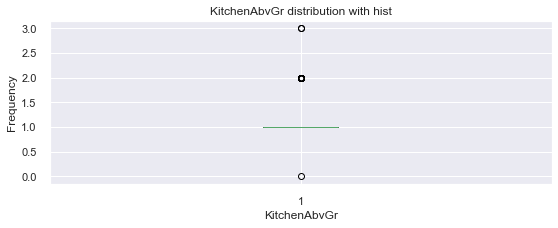

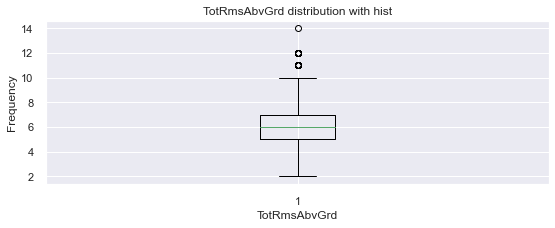

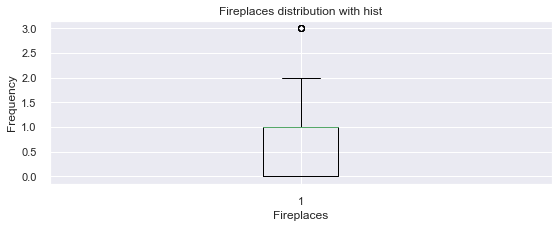

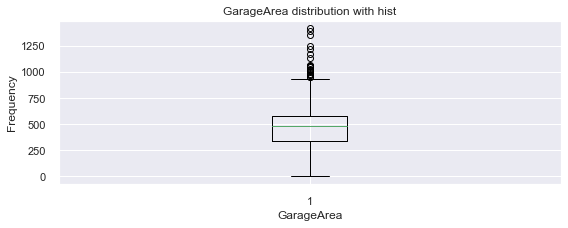

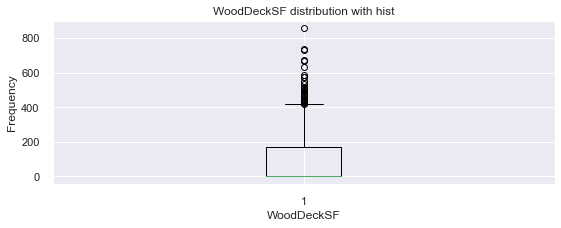

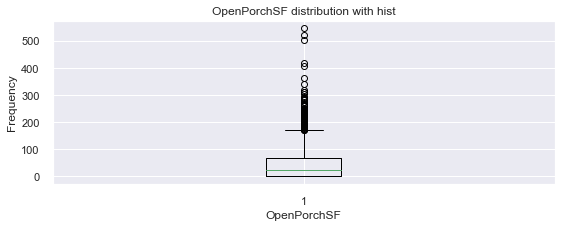

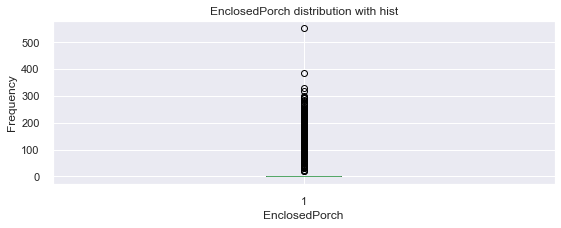

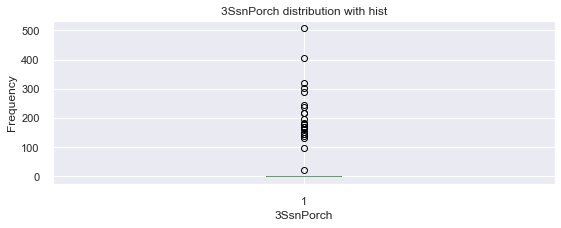

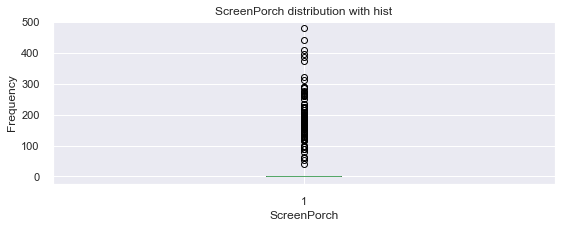

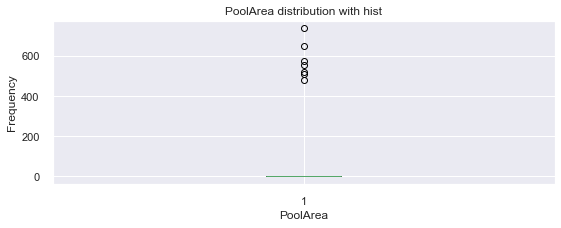

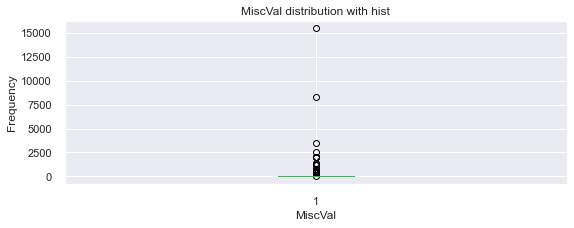

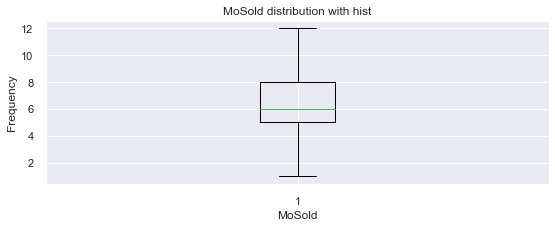

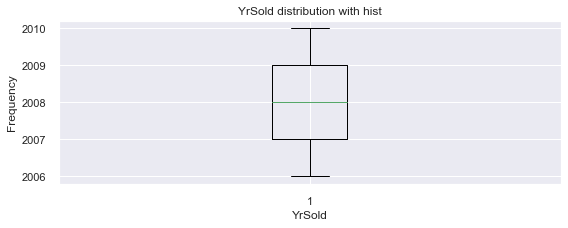

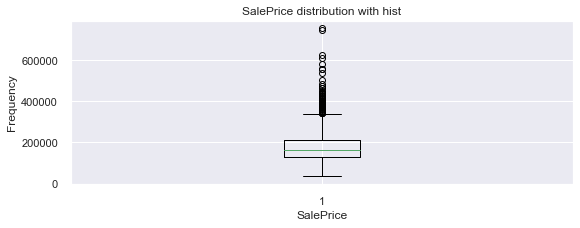

In [35]:
data_num =['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

for n in data_num:
        box(n)

In [36]:
# Function to detect outliers.
def outlier(col): 
    q1= numeric_data[col].quantile(0.25)
    q3=numeric_data[col].quantile(0.75)
    IQR= q3-q1
    lower= q1-(IQR*1.5)
    upper= q3+(IQR*1.5)
    n= len(numeric_data.loc[np.where((numeric_data[col] > upper) | (numeric_data[col] < lower))])
    perc= (n/1460)*100
    print(f'{col}= {perc}')

In [37]:
# To get outliers present in data.
for n in numeric_data:
        outlier(n)

MSSubClass= 7.054794520547945
LotFrontage= 6.027397260273973
LotArea= 4.726027397260274
OverallQual= 0.136986301369863
OverallCond= 8.561643835616438
YearBuilt= 0.4794520547945206
YearRemodAdd= 0.0
MasVnrArea= 6.575342465753424
BsmtFinSF1= 0.4794520547945206
BsmtFinSF2= 11.438356164383562
BsmtUnfSF= 1.9863013698630139
TotalBsmtSF= 4.178082191780822
1stFlrSF= 1.36986301369863
2ndFlrSF= 0.136986301369863
LowQualFinSF= 1.7808219178082192
GrLivArea= 2.1232876712328768
BsmtFullBath= 0.0684931506849315
BsmtHalfBath= 5.616438356164384
FullBath= 0.0
HalfBath= 0.0
BedroomAbvGr= 2.3972602739726026
KitchenAbvGr= 4.657534246575342
TotRmsAbvGrd= 2.054794520547945
Fireplaces= 0.3424657534246575
GarageYrBlt= 0.0
GarageCars= 0.3424657534246575
GarageArea= 1.4383561643835616
WoodDeckSF= 2.191780821917808
OpenPorchSF= 5.273972602739726
EnclosedPorch= 14.246575342465754
3SsnPorch= 1.643835616438356
ScreenPorch= 7.9452054794520555
PoolArea= 0.4794520547945206
MiscVal= 3.5616438356164384
MoSold= 0.0
YrSold

# Outliers Handling

In [38]:
# for MSSubClass
IQR = stats.iqr(data.MSSubClass, interpolation = 'midpoint') 

IQR

50.0

In [39]:
Q1=data.MSSubClass.quantile(0.25)
Q3=data.MSSubClass.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['MSSubClass']> max_limit,'MSSubClass']=np.median(data.MSSubClass)

In [40]:
data.loc[data['MSSubClass']< min_limit,'MSSubClass']=np.median(data.MSSubClass)

<AxesSubplot:xlabel='MSSubClass'>

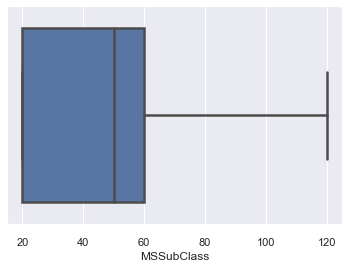

In [41]:
sns.boxplot(data.MSSubClass)

In [42]:
# For LotFrontage
IQR = stats.iqr(data.LotFrontage, interpolation = 'midpoint') 

IQR

19.0

In [43]:
Q1=data.LotFrontage.quantile(0.25)
Q3=data.LotFrontage.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['LotFrontage']> max_limit,'LotFrontage']=np.median(data.LotFrontage)
data.loc[data['LotFrontage']> max_limit,'LotFrontage']=np.log10(data.LotFrontage)

In [44]:
data.loc[data['LotFrontage']< min_limit,'LotFrontage']=np.median(data.LotFrontage)
data.loc[data['LotFrontage']< min_limit,'LotFrontage']=np.log10(data.LotFrontage)

<AxesSubplot:xlabel='LotFrontage'>

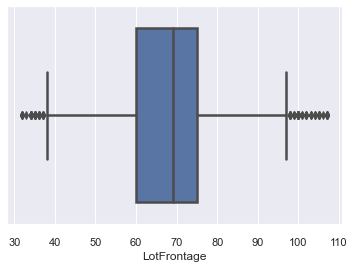

In [45]:
sns.boxplot(data.LotFrontage)

In [46]:
# For LotArea
IQR = stats.iqr(data.LotArea, interpolation = 'midpoint') 

IQR


4054.0

In [47]:
Q1=data.LotArea.quantile(0.25)
Q3=data.LotArea.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['LotArea']> max_limit,'LotFrontage']=np.median(data.LotFrontage)

In [48]:
data.loc[data['LotArea']< min_limit,'LotArea']=np.median(data.LotArea)
data.loc[data['LotArea']< min_limit,'LotArea']=np.log(data.LotArea)

<AxesSubplot:xlabel='LotArea'>

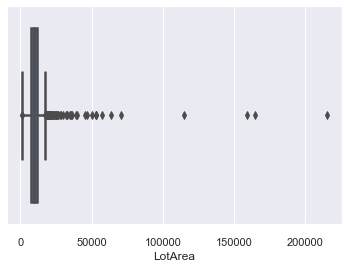

In [49]:
sns.boxplot(data.LotArea)

In [50]:
# For OverallQual
IQR = stats.iqr(data.OverallQual, interpolation = 'midpoint') 

IQR


2.0

In [51]:
Q1=data.OverallQual.quantile(0.25)
Q3=data.OverallQual.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['OverallQual']> max_limit,'OverallQual']=np.median(data.OverallQual)
data.loc[data['OverallQual']> max_limit,'OverallQual']=np.log(data.OverallQual)

In [52]:
data.loc[data['OverallQual']< min_limit,'LotArea']=np.median(data.OverallQual)
data.loc[data['OverallQual']< min_limit,'LotArea']=np.log(data.OverallQual)

<AxesSubplot:xlabel='OverallQual'>

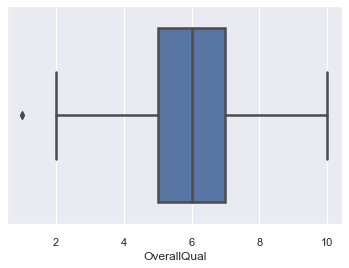

In [53]:
sns.boxplot(data.OverallQual)

In [54]:
# For OverallCond
IQR = stats.iqr(data.OverallCond, interpolation = 'midpoint') 

IQR

1.0

In [55]:
Q1=data.OverallCond.quantile(0.25)
Q3=data.OverallCond.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['OverallCond']> max_limit,'OverallCond']=np.median(data.OverallCond)

In [56]:
data.loc[data['OverallCond']< min_limit,'OverallCond']=np.median(data.OverallCond)
data.loc[data['OverallCond']< min_limit,'OverallCond']=np.log(data.OverallCond)

<AxesSubplot:xlabel='OverallCond'>

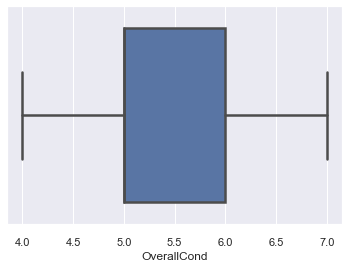

In [57]:
sns.boxplot(data.OverallCond)

In [58]:
# For MasVnrArea
IQR = stats.iqr(data.MasVnrArea, interpolation = 'midpoint') 

IQR

164.5

In [59]:
Q1=data.OverallCond.quantile(0.25)
Q3=data.OverallCond.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['MasVnrArea']> max_limit,'MasVnrArea']=np.median(data.MasVnrArea)

In [60]:
data.loc[data['MasVnrArea']< min_limit,'MasVnrArea']=np.median(data.MasVnrArea)

<AxesSubplot:xlabel='MasVnrArea'>

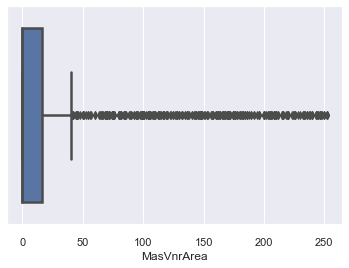

In [61]:
sns.boxplot(data.MasVnrArea)

In [62]:
# For BsmtFinSF1
IQR = stats.iqr(data.BsmtFinSF1, interpolation = 'midpoint') 

IQR

712.5

In [63]:
Q1=data.BsmtFinSF1.quantile(0.25)
Q3=data.BsmtFinSF1.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['BsmtFinSF1']> max_limit,'BsmtFinSF1']=np.median(data.BsmtFinSF1)

In [64]:
data.loc[data['BsmtFinSF1']< min_limit,'BsmtFinSF1']=np.median(data.BsmtFinSF1)


<AxesSubplot:xlabel='BsmtFinSF1'>

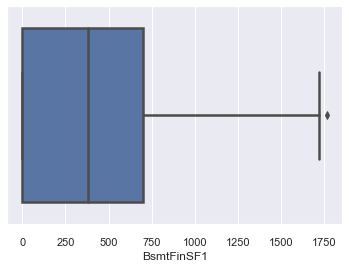

In [65]:
sns.boxplot(data.BsmtFinSF1)

In [66]:
# For BsmtUnfSF
IQR = stats.iqr(data.BsmtUnfSF, interpolation = 'midpoint') 

IQR

585.0

In [67]:
Q1=data.BsmtUnfSF.quantile(0.25)
Q3=data.BsmtUnfSF.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['BsmtUnfSF']> max_limit,'BsmtUnfSF']=np.median(data.BsmtUnfSF)

In [68]:
data.loc[data['BsmtUnfSF']< min_limit,'BsmtUnfSF']=np.median(data.BsmtUnfSF)

<AxesSubplot:xlabel='BsmtUnfSF'>

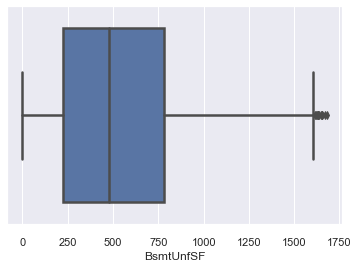

In [69]:
sns.boxplot(data.BsmtUnfSF)

In [70]:
#For TotalBsmtSF
IQR = stats.iqr(data.TotalBsmtSF, interpolation ='midpoint')
IQR

503.0

In [71]:
Q1=data.TotalBsmtSF.quantile(0.25)
Q3=data.TotalBsmtSF.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['TotalBsmtSF']> max_limit,'TotalBsmtSF']=np.median(data.TotalBsmtSF)

In [72]:
data.loc[data['TotalBsmtSF']< min_limit,'TotalBsmtSF']=np.median(data.TotalBsmtSF)
data.loc[data['TotalBsmtSF']< min_limit,'TotalBsmtSF']=np.log(data.TotalBsmtSF)

<AxesSubplot:xlabel='TotalBsmtSF'>

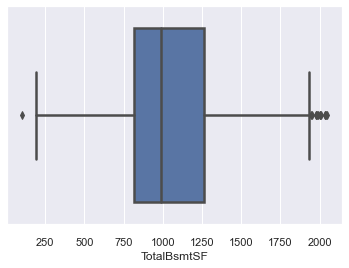

In [73]:
sns.boxplot(data.TotalBsmtSF)

In [74]:
#For GarageArea
IQR = stats.iqr(data.GarageArea, interpolation ='midpoint')
IQR

243.0

In [75]:
Q1=data.GarageArea.quantile(0.25)
Q3=data.GarageArea.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['GarageArea']> max_limit,'GarageArea']=np.median(data.GarageArea)

In [76]:
data.loc[data['GarageArea']< min_limit,'GarageArea']=np.median(data.GarageArea)

<AxesSubplot:xlabel='GarageArea'>

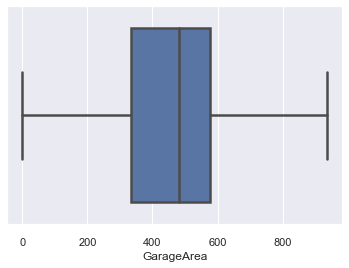

In [77]:
sns.boxplot(data.GarageArea)

In [78]:
#For SalePrice
IQR = stats.iqr(data.SalePrice, interpolation ='midpoint')
IQR

84050.0

In [79]:
Q1=data.SalePrice.quantile(0.25)
Q3=data.SalePrice.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
data.loc[data['SalePrice']> max_limit,'SalePrice']=np.median(data.SalePrice)
data.loc[data['SalePrice']> max_limit,'SalePrice']=np.log(data.SalePrice)

In [80]:
data.loc[data['SalePrice']< min_limit,'SalePrice']=np.median(data.SalePrice)
data.loc[data['SalePrice']< min_limit,'SalePrice']=np.log(data.SalePrice)

<AxesSubplot:xlabel='SalePrice'>

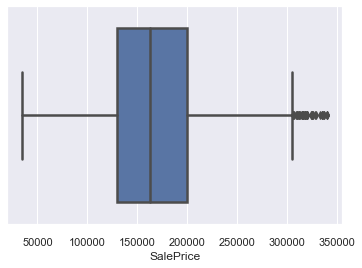

In [81]:
sns.boxplot(data.SalePrice)

### Convert categorical to numerical.

In [82]:
 for col in data_obj:
    print(col,':',data[col].nunique()) # to print unique value of categorical data.

MSZoning : 5
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
Foundation : 6
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
BsmtUnfSF : 755
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
GarageQual : 5
GarageCond : 5
PoolQC : 3
Fence : 4
FireplaceQu : 5
GarageType : 6
MiscFeature : 4
GarageFinish : 3
SaleType : 9
ExterCond : 5
PavedDrive : 3
BsmtQual : 4


In [83]:
# Encode some categorical features as ordered numbers when there is information in the order
data = data.replace({"Street" : {"Grvl" : 1, "Pave" : 2},
                     "Alley" : {"Grvl" : 1, "Pave" : 2},
                     "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                     "LandContour":{"Lvl" : 1, "Bnk" : 2, "HLS" : 3, "Low" : 4},
                     "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                     "LotConfig": {"Inside":1,"Corner": 2,"CulDSac": 3,"FR2":4,"FR3":5},
                     "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                     "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                     "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                     "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "Electrical" : {"Mix" : 0,"FuseF" : 1,"FuseA" : 2,"FuseP" : 3,"SBrkr" : 4},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                     "Fence":{" GdPrv":4,"GdWo":3,"MnPrv":2,"MnWw":1,"NA":0}}
                     )
data.head(3)

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                       
1         60.0       RL         65.0   8450.0       2      1         4   
2         20.0       RL         80.0   9600.0       2      1         4   
3         60.0       RL         68.0  11250.0       2      1         3   

    LandContour  Utilities  LotConfig LandSlope Neighborhood Condition1  \
Id                                                                        
1             1          4          1       Gtl      CollgCr       Norm   
2             1          4          4       Gtl      Veenker      Feedr   
3             1          4          1       Gtl      CollgCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story          7.0          5.0       2003   
2        Norm     1Fam     1Story          6.0          5.0       1976   
3        Norm     1Fam     2Story          7.0          5.0       2001   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
Id                                                                    
1        196.0          4          3      PConc         4         3   
2          0.0          3          3     CBlock         4         3   
3        162.0          4          3      PConc         4         3   

    BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                     
1              0             6       706.0             1           0   
2              3             5       978.0             1           0   
3              1             6       486.0             1           0   

    BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir  Electrical  \
Id                                                                     
1       150.0        856.0    GasA          5          Y           4   
2       284.0       1262.0    GasA          5          Y           4   
3       434.0        920.0    GasA          5          Y           4   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1        856       854             0       1710             1             0   
2       1262         0             0       1262             0             1   
3        920       866             0       1786             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Id                                                                              
1          2         1             3             1            4             8   
2          2         0             3             1            3             6   
3          2         1             3             1            4             6   

    Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  \
Id                                                                             
1            8           0            4     Attchd       2003.0          RFn   
2            8           1            3     Attchd       1976.0          RFn   
3            8           1            3     Attchd       2001.0          RFn   

    GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
Id                                                                           
1            2       548.0           3           3           2           0   


In [84]:
from sklearn.preprocessing import LabelEncoder
cols = ('MSZoning','Neighborhood','LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
       'Exterior2nd','MasVnrType','Foundation','BsmtUnfSF','Heating', 'CentralAir','GarageType','MiscFeature','GarageFinish',
        'SaleCondition','SaleType','BsmtQual')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                        
1         60.0         3         65.0   8450.0       2      1         4   
2         20.0         3         80.0   9600.0       2      1         4   
3         60.0         3         68.0  11250.0       2      1         3   
4         70.0         3         60.0   9550.0       2      1         3   
5         60.0         3         84.0  14260.0       2      1         3   

    LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                           
1             1          4          1          0             5           2   
2             1          4          4          0            24           1   
3             1          4          1          0             5           2   
4             1          4          2          0             6           2   
5             1          4          4          0            15           2   

    Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1            2         0           5          7.0          5.0       2003   
2            2         0           2          6.0          5.0       1976   
3            2         0           5          7.0          5.0       2001   
4            2         0           5          7.0          5.0       1915   
5            2         0           5          8.0          5.0       2000   

    YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
Id                                                                            
1           2003          1         1           12           13           1   
2           1976          1         1            8            8           2   
3           2002          1         1           12           13           1   
4           1970          1         1           13           15           2   
5           2000          1         1           12           13           1   

    MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
Id                                                                     
1        196.0          4          3           2         2         3   
2          0.0          3          3           1         2         3   
3        162.0          4          3           2         2         3   
4          0.0          3          3           0         1         4   
5          0.0          4          3           2         2         3   

    BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                     
1              0             6       706.0             1           0   
2              3             5       978.0             1           0   
3              1             6       486.0             1           0   
4              0             5       216.0             1           0   
5              2             6       655.0             1           0   

    BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
Id                                                                       
1          73        856.0        1          5           1           4   
2         167       1262.0        1          5           1           4   
3         278        920.0        1          5           1           4   
4         347        756.0        1          4           1           4   
5         319       1145.0        1          5           1           4   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1        856       854             0       1710             1             0   
2       1262         0             0       1262             0          

In [85]:
# to convert object feature to numeric using dummy variable
obj_feat = list(data.loc[:,data.dtypes == 'object'].columns.values)
len(obj_feat)

1

In [86]:
# Create dummy varaibale
dummy_drop = []
clean_data = data
for i in obj_feat:
    dummy_drop += [i + '_' + str(data[i].unique()[-1])]

data1 = pd.get_dummies(data, columns = obj_feat)
data1 = data1.drop(dummy_drop, axis = 1)
print(data1.shape)

(1460, 82)


## Feature Scaling

In [87]:
for column in data1:
    print(stats.skew(data1[column]), column) # To get Skewness 

0.8353978330471481 MSSubClass
-1.7336119298834811 MSZoning
0.027750119917549287 LotFrontage
12.182196499533307 LotArea
-15.50282102976064 Street
5.713024565376394 Alley
-1.3086393966002137 LotShape
3.4628175645150443 LandContour
-38.17067834609388 Utilities
1.9918118338282909 LotConfig
4.808735448272335 LandSlope
0.042078242205610454 Neighborhood
3.016093046444231 Condition1
13.158307370990793 Condition2
2.243340180872296 BldgType
0.3064393441695801 HouseStyle
0.2167209765258641 OverallQual
0.9384016846228357 OverallCond
-0.612830724202899 YearBuilt
-0.5030444967597948 YearRemodAdd
1.4722817675462803 RoofStyle
8.101068065041186 RoofMatl
-0.7255671408095768 Exterior1st
-0.6922505233227669 Exterior2nd
-0.07355141322824853 MasVnrType
1.8235158557564526 MasVnrArea
0.8251396286671284 ExterQual
1.3957827167524748 ExterCond
0.09112363596569947 Foundation
0.33076358151789415 BsmtQual
0.003716304955089987 BsmtCond
1.2138202019814957 BsmtExposure
-0.12420853752796614 BsmtFinType1
0.6881805249917

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
data1[['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
      'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
      'GarageArea','GrLivArea']]= sc.fit_transform(data1[['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                                         'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','WoodDeckSF',
                                                        'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                                                         'PoolArea','GarageArea','GrLivArea']])

In [89]:
data1.describe(include='all')

MSSubClass     MSZoning   LotFrontage       LotArea       Street  \
count  1460.000000  1460.000000  1.460000e+03  1.460000e+03  1460.000000   
mean     48.383562     3.028767 -5.266335e-16  5.560620e-19     1.995890   
std      28.160234     0.632017  1.000343e+00  1.000343e+00     0.063996   
min      20.000000     0.000000 -2.707773e+00 -1.053162e+00     1.000000   
25%      20.000000     3.000000 -6.430916e-01 -2.964124e-01     2.000000   
50%      50.000000     3.000000  2.055590e-02 -1.036309e-01     2.000000   
75%      60.000000     3.000000  4.629876e-01  1.091376e-01     2.000000   
max     120.000000     4.000000  2.822623e+00  2.051122e+01     2.000000   

             Alley     LotShape  LandContour    Utilities    LotConfig  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      1.028082     3.591781     1.185616     3.998630     1.416438   
std       0.165264     0.582296     0.606509     0.052342     0.773448   
min       1.000000     1.000000     1.000000     2.000000     1.000000   
25%       1.000000     3.000000     1.000000     4.000000     1.000000   
50%       1.000000     4.000000     1.000000     4.000000     1.000000   
75%       1.000000     4.000000     1.000000     4.000000     2.000000   
max       2.000000     4.000000     4.000000     4.000000     5.000000   

         LandSlope  Neighborhood   Condition1   Condition2     BldgType  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.062329     12.251370     2.031507     2.008219     0.493151   
std       0.276232      6.013735     0.868515     0.259040     1.198277   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      7.000000     2.000000     2.000000     0.000000   
50%       0.000000     12.000000     2.000000     2.000000     0.000000   
75%       0.000000     17.000000     2.000000     2.000000     0.000000   
max       2.000000     24.000000     8.000000     7.000000     4.000000   

        HouseStyle  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean      3.038356     6.099315     5.414384  1971.267808   1984.865753   
std       1.911305     1.382997     0.775878    30.202904     20.645407   
min       0.000000     1.000000     4.000000  1872.000000   1950.000000   
25%       2.000000     5.000000     5.000000  1954.000000   1967.000000   
50%       2.000000     6.000000     5.000000  1973.000000   1994.000000   
75%       5.000000     7.000000     6.000000  2000.000000   2004.000000   
max       7.000000    10.000000     7.000000  2010.000000   2010.000000   

         RoofStyle     RoofMatl  Exterior1st  Exterior2nd   MasVnrType  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      1.410274     1.075342     9.624658    10.339726     1.762329   
std       0.834998     0.599127     3.197659     3.540570     0.614274   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     8.000000     8.000000     1.000000   
50%       1.000000     1.000000    12.000000    13.000000     2.000000   
75%       1.000000     1.000000    12.000000    13.000000     2.000000   
max       5.000000     7.000000    14.000000    15.000000     3.000000   

         MasVnrArea   ExterQual    ExterCond   Foundation     BsmtQual  \
count  1.460000e+03  1460.00000  1460.000000  1460.000000  1460.000000   
mean  -3.741300e-17     3.39589     3.083562     1.396575     1.565068   
std    1.000343e+00     0.57428     0.351054     0.722394     0.678071   
min   -5.092017e-01     2.00000     1.000000     0.000000     0.000000   
25%   -5.092017e-01     3.00000     3.000000     1.000000     1.000000   
50%   -5.092017e-01     3.00000     3.000000     1.000000     2.000000   
75%   -2.691421e-01     4.00000     3.000000     2.000000     2.000000   
max    3.271737e+00     5.00000     5.000000 

In [90]:
# Feature Selection

In [91]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = data.corr()
hig_corr_feat = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]
hig_corr_feat

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [92]:
# Model Building

In [93]:
## Definig independent and dependent variables
X=data1.iloc[:,0:-1] ## independent variables
y=data1.SalePrice ## dependent or target variable.

In [94]:
data.shape

(1460, 80)

In [95]:
X=data1.iloc[:,0:78] ## independent variables
y=data1.SalePrice ## dependent or target variable.

In [96]:
## Defining training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [97]:
X_train

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
Id                                                                           
1024       120.0         3    -1.896648 -0.734372       2      1         4   
811         20.0         3     0.684203 -0.037283       2      1         4   
1385        50.0         3    -0.643092 -0.145483       2      1         4   
627         20.0         3     0.020556  0.183325       2      1         3   
814         20.0         3     0.462988 -0.076355       2      1         4   
...          ...       ...          ...       ...     ...    ...       ...   
1096        20.0         3     0.684203 -0.119736       2      1         3   
1131        50.0         3    -0.274399 -0.271316       2      1         4   
1295        20.0         3    -0.643092 -0.234448       2      1         4   
861         50.0         3    -1.011785 -0.287546       2      1         4   
1127       120.0         3    -1.159262 -0.684079       2      1         4   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                             
1024            1          4          1          0             0           2   
811             1          4          1          0            14           2   
1385            1          4          1          0             7           2   
627             1          4          1          0            12           2   
814             1          4          1          0            12           2   
...           ...        ...        ...        ...           ...         ...   
1096            1          4          1          0             5           2   
1131            1          4          1          0            18           2   
1295            1          4          1          0             7           2   
861             1          4          2          0             6           2   
1127            1          4          1          0             0           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1024           2         4           2          7.0          5.0       2005   
811            2         0           2          6.0          6.0       1974   
1385           2         0           0          6.0          5.0       1939   
627            2         0           2          5.0          5.0       1960   
814            2         0           2          6.0          6.0       1958   
...          ...       ...         ...          ...          ...        ...   
1096           2         0           2          6.0          5.0       2006   
1131           2         0           0          4.0          5.0       1928   
1295           2         0           2          5.0          7.0       1955   
861            2         0           0          7.0          5.0       1918   
1127           2         4           2          7.0          5.0       2007   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
Id                                                                              
1024          2006          1         1           12           13           1   
811           1999          3         1            6            6           1   
1385          1950          1         1           14           15           2   
627           1978          3         1           13           14           2   
814           1958          1         1            8            8           1   
...            ...        ...       ...          ...          ...         ...   
1096          2006          1         1           12           13           2   
1131          1950          1         1           14           10           2   
1295          1990          3         1           14           10           2   
861           1998          1  

In [98]:
## Model creation

In [99]:
## importing the model library
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
#!pip install lightgbm
from lightgbm import LGBMRegressor

In [100]:
# Linear Regression
LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.
y_hat=LR.predict(X_test) ## prediciton from model

In [101]:
y_hat

array([146135.93936123, 268172.95952844, 109275.49317835, 165859.09433654,
       242130.09775272,  67368.65147053, 194223.46096028, 143821.08239055,
        70730.2185543 , 141200.86770892, 148993.88473487, 123626.10670482,
        78764.38812119, 201275.73721618, 183369.21205626, 149466.54949723,
       201700.79896678, 146976.8262145 , 133760.86066349, 205290.09481387,
       150128.98549266, 219259.47217549, 188669.53503528, 152747.09204643,
       205083.2038919 , 181490.09797621, 189832.77634447,  99964.75302904,
       192627.53916834, 221074.93421246, 166011.91374951, 237989.12586838,
       173006.10522589, 120392.46261756, 238867.55177678, 164422.634321  ,
       154984.45608321, 202720.86387288, 270771.97319125, 103064.77271673,
       120527.47907728, 217595.62494615, 115375.59984087, 217613.46692167,
       127600.82235037, 135977.24112183, 114008.65937003, 140510.02990454,
       278998.57176407, 142142.32407042, 118395.62985643, 227477.28327   ,
       107017.10897731, 2

### Model Evaluation

In [102]:
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.7168834323733286

In [103]:
test_score=r2_score(y_test,y_hat)
test_score

0.6748022158212014

In [104]:
X_train.shape,X_test.shape

((1095, 78), (365, 78))

In [105]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.84)*(1095-1)/(1095-79-1)
train_adjusted_r2

0.8275467980295567

In [106]:
test_adjusted_r2= 1-(1-0.84)*(365-1)/(365-79-1)
test_adjusted_r2

0.7956491228070175

In [107]:
# Ridge Regression
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridge.fit(X_train,y_train)
y_rdg=ridge.predict(X_test)
print("RidgeCV Best Alpha Scored: ", ridge.alpha_)
print("RidgeCV Model Accuracy: ", ridge.score(X, y))

RidgeCV Best Alpha Scored:  1.0
RidgeCV Model Accuracy:  0.7066612112450912


In [108]:
# Lasso Regression
l_reg = LassoCV(cv=5, random_state=101)
l_reg.fit(X,y)
y_lreg=ridge.predict(X_test)
print("LassoCV Best Alpha Scored: ", l_reg.alpha_)
print("LassoCV Model Accuracy: ", l_reg.score(X, y))

LassoCV Best Alpha Scored:  2019.1639898114101
LassoCV Model Accuracy:  0.6762930264689782


In [109]:
# GradientBoosting
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)
print(gbm.score(X_train,y_train))
print(gbm.score(X_test,y_test))

0.9144504341101951
0.7746529087951907


In [110]:
# XGBoosting
xgb_r=XGBRegressor()
xgb_r.fit(X_train,y_train)
y_xgb=xgb_r.predict(X_test)
print(xgb_r.score(X_train,y_train))
print(xgb_r.score(X_test,y_test))

0.9997185374830575
0.7682924007271684


In [111]:
# DecisionTree
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_dtr=dt.predict(X_test)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.5440844007698511


In [112]:
from sklearn.metrics import mean_squared_error
#from sklearn.pipeline import make_pipeline
lgbm = LGBMRegressor(objective='regression',
                              num_leaves=4,
                              learning_rate=0.05, 
                              n_estimators=1250,
                              max_bin=75, 
                              bagging_fraction=0.8,
                              bagging_freq=9, 
                              feature_fraction=0.45,
                              feature_fraction_seed=9, 
                              bagging_seed=12,
                              min_data_in_leaf=3, 
                              min_sum_hessian_in_leaf=2).fit(X_train, y_train)
y_lgbm = lgbm.predict(X_test)
print(lgbm.score(X_train,y_train))
print(lgbm.score(X_test,y_test))

[LightGBM] [Warning] feature_fraction is set=0.45, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
0.9690958995943447
0.7806873369785383


In [113]:
# LGBMRegressor model have better score than other model.

In [114]:
#Hyperparameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiating the GridSearchCV object
xgb_cv = GridSearchCV(xgb_r, param_grid, cv = 5)  
xgb_cv.fit(X, y)
# Print the tuned parameters and score
print("Tuned  Regression Parameters: {}".format(xgb_cv.best_params_)) 
print("Best score is {}".format(xgb_cv.best_score_))

[19:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passe

[19:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passe

[19:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passe

[19:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passe